# Pokemon Data Analytics challenge

datasource: https://www.kaggle.com/rounakbanik/pokemon/data


- **opdracht 1**: kies ten minste 4 relaties die je wilt visualiseren/metrics over wilt berekenen, zoals vraag q1 heronder
    - licht elke vraag toe (waarom deze vraag, mag kort in 2 zinnnen)
    - schrijf uit wat je 'ziet' in de data
    - trek, wanneer mogelijk, een conclusie, of bespreek wat voor iets je extra in beschouwing zou moeten nemen
- **opdracht 2**: Kies een wat grotere vraag die je wilt beantwoorden, bijvoorbeeld:
    - Is it possible to build a classifier to identify legendary Pokemon?
    - Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.
        - wat een dreamteam is mag je zelf verzinnen, je kunt natuurlijk ook voor inspiratie daarover het internet op gaan

eisen van de opdracht:
- schrijf je data pipeline componenten netjes in functies
- probeer generieke data processing 'naar voren' te halen in je data pipeline
- probeer je dataverwerking te scheiden van je plotting waar mogelijk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pprint

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
os.getcwd()

'C:\\Users\\Carolien van Alphen\\OneDrive - Digital Power BV\\Tools\\Python\\DiP Python oefeningen\\python_03_pokemon'

In [3]:
df = pd.read_csv('pokemon_dataset.csv')

# Take a general look at the dataset
-----------------------------------

In [4]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [5]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [6]:
df.rename(columns={'defense':'defences', 'sp_defense':'sp_defence', 'classfication':'classification'}).head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defences,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defence,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [8]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [9]:
df_sel = df[[
        'pokedex_number',
        'name',
        'generation',
        'classfication',
        'hp',
        'defense',
        'sp_defense',
        'attack',
        'sp_attack',
        'speed',
        'weight_kg',
        'height_m',
        'base_total',
        'base_happiness',
        'capture_rate',
        'is_legendary'
    ]]


In [10]:
sns.set_style('darkgrid')
#sns.pairplot(df_sel)

# Set df processing pipeline
--------------------------

In [11]:
df = pd.read_csv('pokemon_dataset.csv')

In [12]:
def rename_columns(dataf):
    return (dataf
            .rename(columns={'defense':'defence', 'sp_defense':'sp_defence', 'classfication':'classification'})
           )

    
def filter_columns(dataf):
    keep_columns = [
        'pokedex_number',
        'name',
        'generation',
        'type1',
        'type2',
        'hp',
        'defence',
        'sp_defence',
        'attack',
        'sp_attack',
        'speed',
        'weight_kg',
        'height_m',
        'base_total',
        'base_happiness',
        'capture_rate',
        'is_legendary'
    ]
    return dataf[keep_columns]

def filter_rows(dataf, generation=False):
    if generation == False:
        return dataf
    else:
        return (dataf
                .loc[dataf['generation'].isin(generation)]
               )
    
def preprocess_columns(dataf):
    return (dataf
            .assign(capture_rate=dataf['capture_rate'].str.replace(pat='.*Meteorite.*', repl='30', regex=True))
           )

def change_dtypes(dataf):
    return (dataf
            .astype({'pokedex_number': object, 'generation': object, 'capture_rate': 'int64'})
           )



In [13]:
clean_df = (df
            .pipe(rename_columns)
            .pipe(filter_columns)
            .pipe(filter_rows)
            .pipe(preprocess_columns)
            .pipe(change_dtypes)
           )
clean_df

,pokedex_number,name,generation,type1,type2,hp,defence,sp_defence,attack,sp_attack,speed,weight_kg,height_m,base_total,base_happiness,capture_rate,is_legendary
0,1,Bulbasaur,1,grass,poison,45,49,65,49,65,45,6.9,0.7,318,70,45,0
1,2,Ivysaur,1,grass,poison,60,63,80,62,80,60,13.0,1.0,405,70,45,0
2,3,Venusaur,1,grass,poison,80,123,120,100,122,80,100.0,2.0,625,70,45,0
3,4,Charmander,1,fire,NaN,39,43,50,52,60,65,8.5,0.6,309,70,45,0
4,5,Charmeleon,1,fire,NaN,58,58,65,64,80,80,19.0,1.1,405,70,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,steel,flying,97,103,101,101,107,61,999.9,9.2,570,0,25,1
797,798,Kartana,7,grass,steel,59,131,31,181,59,109,0.1,0.3,570,0,255,1
798,799,Guzzlord,7,dark,dragon,223,53,53,101,97,43,888.0,5.5,570,0,15,1
799,800,Necrozma,7,psychic,NaN,97,101,89,107,127,79,230.0,2.4,600,0,3,1


# Example question: what is the relation between weight and attack?

- hieronder alleen een stukje code met een voorbeeld voor scheiden van dataverwerking van plotting. mijn analyse op 'wat zie je' ontbreekt

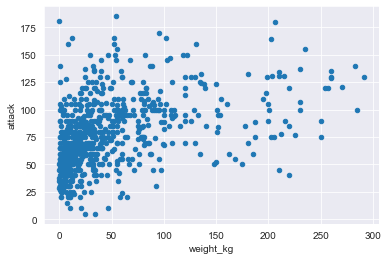

In [14]:
def remove_fatties(dataf, fat=200):
    return dataf.loc[lambda d: d['weight_kg'] < fat]

(clean_df
 .pipe(remove_fatties, fat=300)
 .plot(x='weight_kg',y='attack', kind='scatter')
)

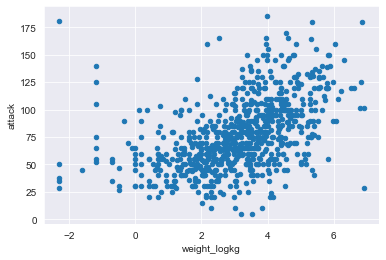

In [15]:
#Normalize weight instead of removing outliers.
def norm_weight(dataf):
    return (dataf
            .assign(weight_logkg=dataf['weight_kg'].apply(np.log))
           )


(clean_df
 .pipe(norm_weight)
 .plot(x='weight_logkg',y='attack', kind='scatter')
)


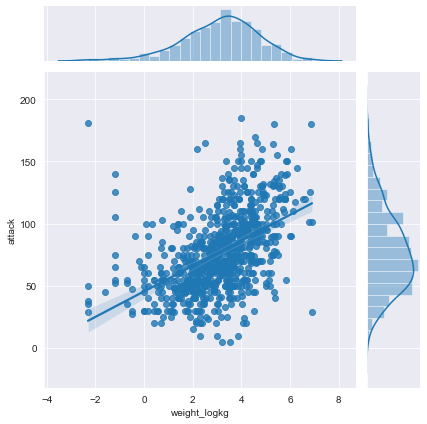

In [16]:
sns_df = (clean_df
 .pipe(norm_weight)
)

sns.jointplot(data=sns_df, x='weight_logkg', y='attack', kind='reg')

# Q1+2 What is the relation between attack and capture rate?
-------------------------------------------
The hypothese is that pokemon with a higher attacking power are more difficult to catch, e.a. have a lower capture rate. Additional question is wether there is a difference in the trend between generations, and type of pokemon.


In [17]:
clean_df.head()

,pokedex_number,name,generation,type1,type2,hp,defence,sp_defence,attack,sp_attack,speed,weight_kg,height_m,base_total,base_happiness,capture_rate,is_legendary
0,1,Bulbasaur,1,grass,poison,45,49,65,49,65,45,6.9,0.7,318,70,45,0
1,2,Ivysaur,1,grass,poison,60,63,80,62,80,60,13.0,1.0,405,70,45,0
2,3,Venusaur,1,grass,poison,80,123,120,100,122,80,100.0,2.0,625,70,45,0
3,4,Charmander,1,fire,NaN,39,43,50,52,60,65,8.5,0.6,309,70,45,0
4,5,Charmeleon,1,fire,NaN,58,58,65,64,80,80,19.0,1.1,405,70,45,0


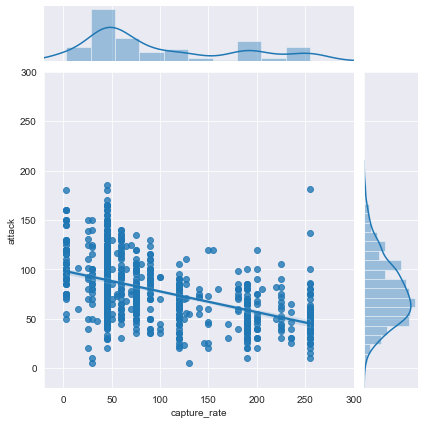

In [18]:
sns.jointplot(data=clean_df, x='capture_rate', y='attack', kind='reg', xlim=(-20, 300), ylim=(-20, 300))

Het lijkt er op dat er een lichte trend is, dat een hogere HP samenhangt met een lagere capture rate. Opvallend is dat de HP over de dataset redelijk normaal verdeeld is, terwijl de capture rate een normaalverdeling toont rond een capture rate van 40-50, maar met een lange staart richting een max. capture rate van net boven de 250.

- Wat zou er gebeuren als we capture rate normaliseren om een meer normale verdeling te krijgen voor deze metric?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


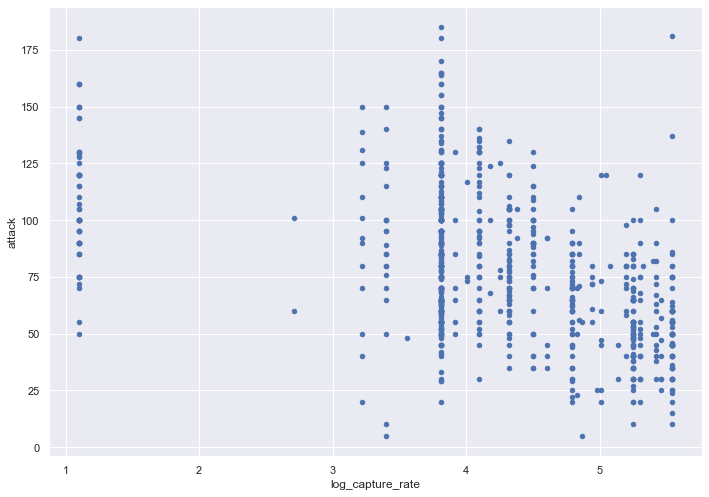

In [19]:
#Normalize weight instead of removing outliers.
def norm_capture_rate(dataf):
    return (dataf
            .assign(log_capture_rate=dataf['capture_rate'].apply(np.log))
           )

sns.set(rc={'figure.figsize':(11.7,8.27)})

(clean_df
 .pipe(norm_capture_rate)
 .plot(x='log_capture_rate',y='attack', kind='scatter')
)


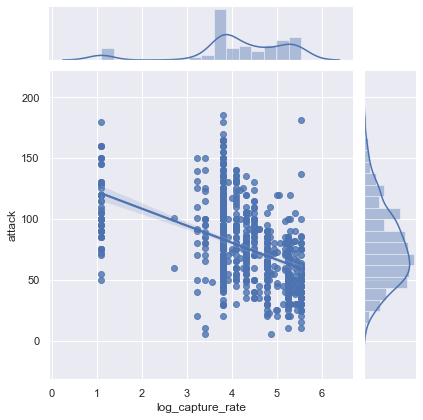

In [20]:
sns_df = (clean_df
 .pipe(norm_capture_rate)
)

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.jointplot(data=sns_df, x='log_capture_rate', y='attack', kind='reg')

Normalisatie toont dat er 1 in specifiek is die een heel lage capture rate heeft. Mogelijk zijn dit de legendary pokemon

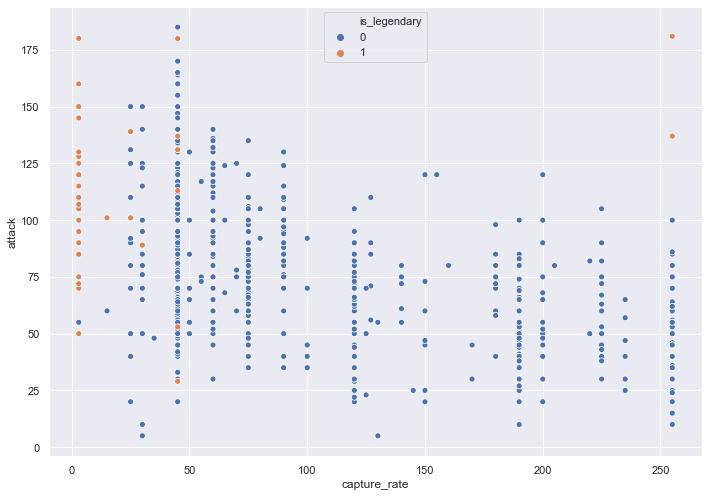

In [23]:
sns.scatterplot(data=sns_df, x='capture_rate', y='attack', hue='is_legendary', )

Is de verdeling gelijk over alle generaties?

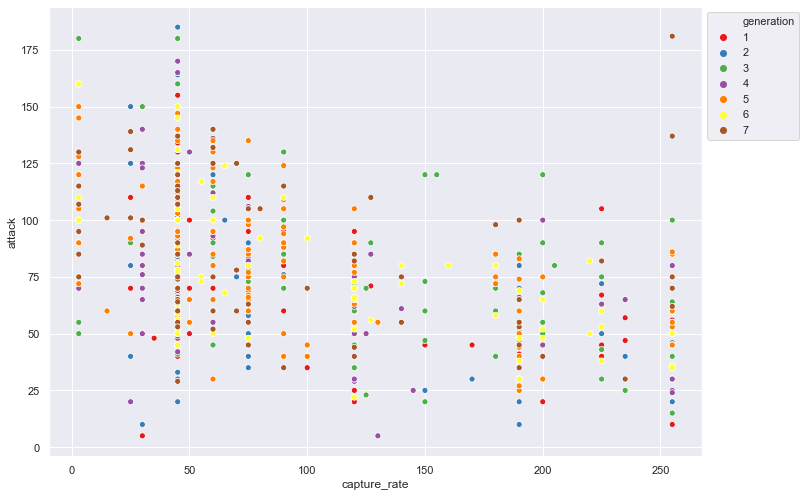

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=sns_df, 
                x='capture_rate', 
                y='attack', 
                hue='generation', 
                palette='Set1')
plt.legend(loc='upper left', bbox_to_anchor=[1,1])


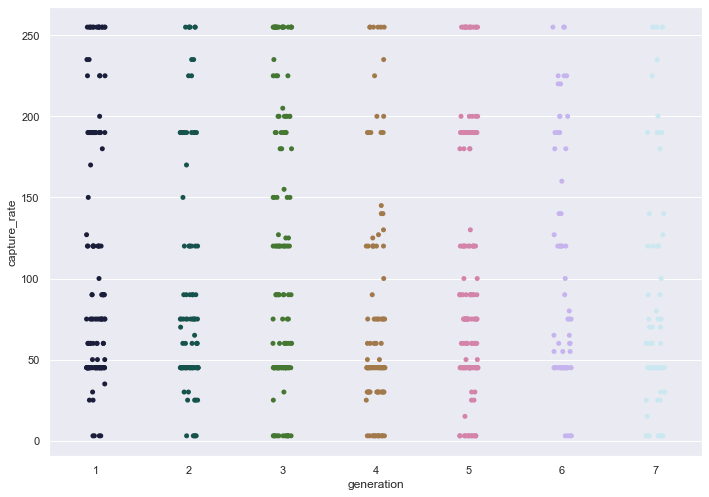

In [25]:
sns.stripplot(data=sns_df, x='generation', y='capture_rate', palette='cubehelix')


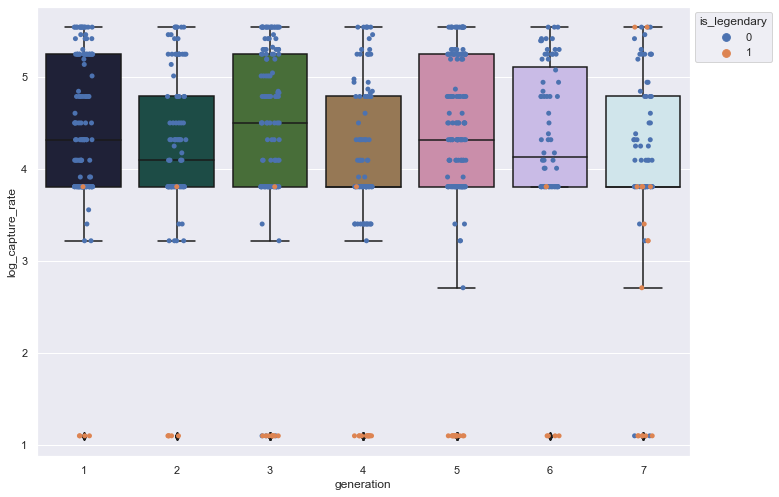

In [29]:
sns.boxplot(data=sns_df, x='generation', y='log_capture_rate', palette='cubehelix')
sns.stripplot(data=sns_df, x='generation', y='log_capture_rate', hue='is_legendary')
plt.legend(loc='upper left', bbox_to_anchor=[1,1], title='is_legendary')

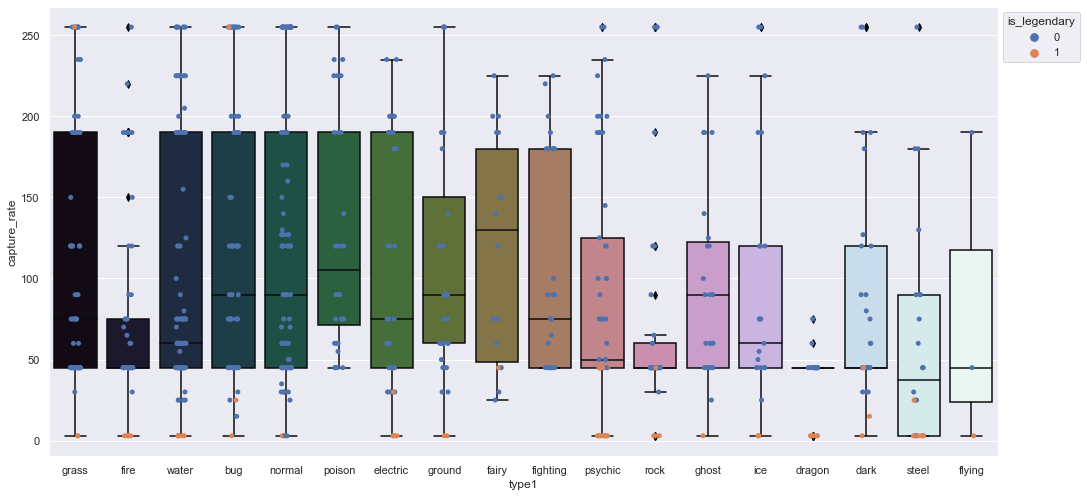

In [31]:
sns.boxplot(data=sns_df, x='type1', y='capture_rate', palette='cubehelix')
sns.stripplot(data=sns_df, x='type1', y='capture_rate', hue='is_legendary')
plt.legend(loc='upper left', bbox_to_anchor=[1,1], title='is_legendary')

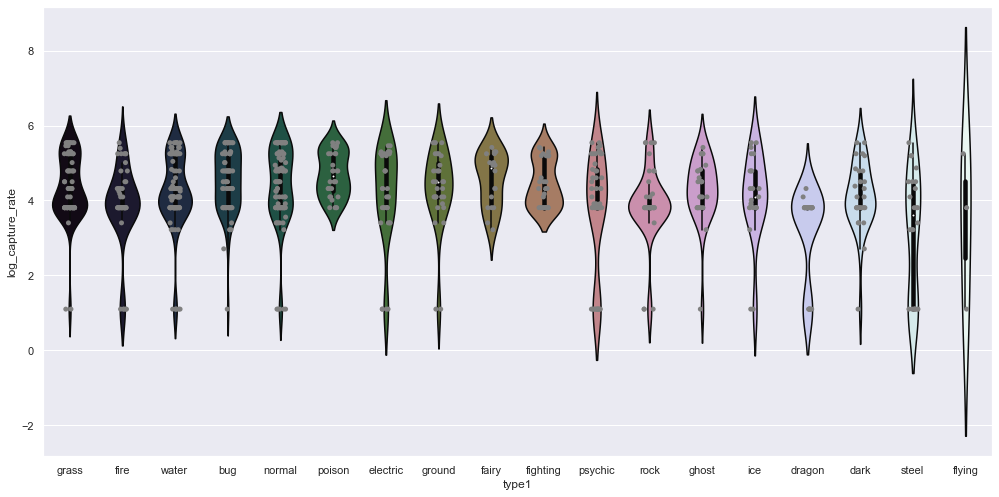

In [32]:
sns.set(rc={'figure.figsize':(17,8.27)})

sns.violinplot(data=sns_df, x='type1', y='log_capture_rate', palette='cubehelix')
sns.stripplot(data=sns_df, x='type1', y='log_capture_rate', color='Grey')

# Discussion
--------------------------
Capture Rate and Attack show a slight inverse correlation, with a higher attacking power correlating with a lower Capture Rate. With a few exceptions, legendary pokemon have the lowest capture rate of all pokemon.
Interestingly, there seem to be a few 'standard' capture rates in the dataset where more polemon group into, causing the scatter point to show vertical lines for specific capture_rates, though there is some scatter throughout. These 'standard' capture_rates seems to be more prevalent in the generations 1-5. Capture rates seem to show more variation for the 6th and 7th generation.
Capture rate for some types of pokemon were lower compared to the rest, such as for fire, rock and dragon pokemon. Legendary pokemon exist for almost all pokemon types except poison and fighting types.

# Q3 What is the relation between attack and defence?
--------------------------
The hypothesis is that a higher defence rate correlates with a higher attack rate. 

In [33]:
clean_df.head()

,pokedex_number,name,generation,type1,type2,hp,defence,sp_defence,attack,sp_attack,speed,weight_kg,height_m,base_total,base_happiness,capture_rate,is_legendary
0,1,Bulbasaur,1,grass,poison,45,49,65,49,65,45,6.9,0.7,318,70,45,0
1,2,Ivysaur,1,grass,poison,60,63,80,62,80,60,13.0,1.0,405,70,45,0
2,3,Venusaur,1,grass,poison,80,123,120,100,122,80,100.0,2.0,625,70,45,0
3,4,Charmander,1,fire,NaN,39,43,50,52,60,65,8.5,0.6,309,70,45,0
4,5,Charmeleon,1,fire,NaN,58,58,65,64,80,80,19.0,1.1,405,70,45,0


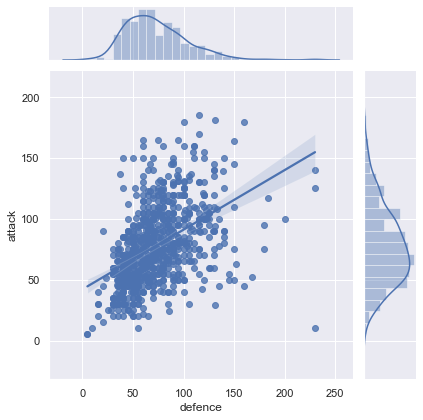

In [34]:
sns.jointplot(data=clean_df, x='defence', y='attack', kind='reg')

In [35]:
#find outlier
clean_df[clean_df['defence'] > 200][clean_df['attack'] < 20]

C:\ProgramData\Anaconda3\envs\Seaborn10\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,pokedex_number,name,generation,type1,type2,hp,defence,sp_defence,attack,sp_attack,speed,weight_kg,height_m,base_total,base_happiness,capture_rate,is_legendary
212,213,Shuckle,2,bug,rock,20,230,230,10,10,5,20.5,0.6,505,70,190,0


C:\ProgramData\Anaconda3\envs\Seaborn10\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\envs\Seaborn10\lib\site-packages\seaborn\distributions.py:434: UserWarning: The following kwargs were not used by contour: 'diag_kws'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


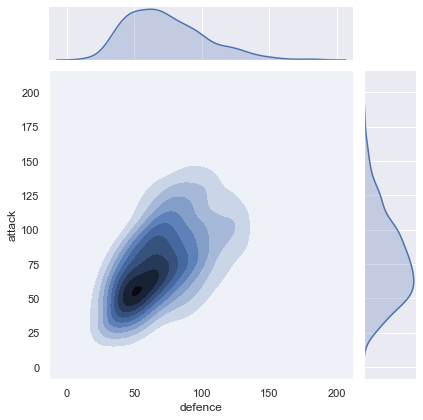

In [48]:
#Run plot with outlier removed
def remove_outlier(dataf):
    return (dataf
            [dataf['defence'] < 200]
            [dataf['attack'] > 20]
           )

clean_df2 = (clean_df
             .pipe(remove_outlier)
            )

sns.jointplot(data=clean_df2, x='defence', y='attack', kind='kde')

# Q4 What is the relation between attack and defence and Base_total?
--------------------------
A higher defence indeed correlates with a higher attack, and both scores are normally distributed. Both metrics are part of the base_total score. How does this compare?

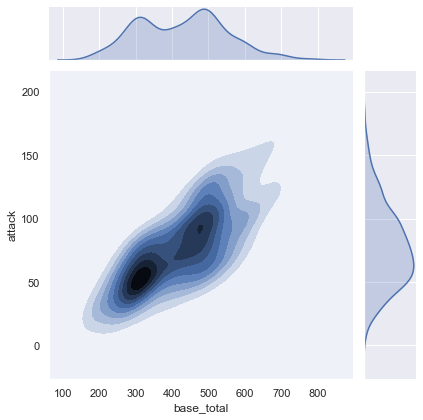

In [37]:
sns.jointplot(data=clean_df, x='base_total', y='attack', kind='kde')

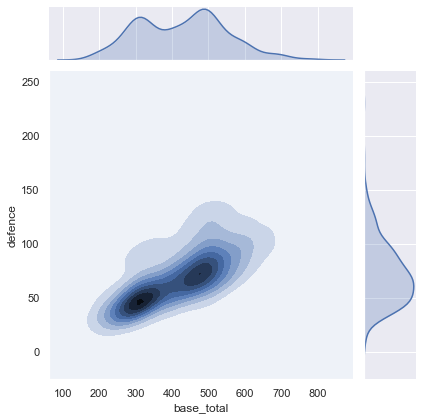

In [38]:
sns.jointplot(data=clean_df, x='base_total', y='defence', kind='kde')

Base_total shows a double peak in the histogram, indicating that there is another factor, besides attack or defence important for determining base_total. Other factors contributing to this score are hp, speed, sp_attack, and sp_defence. Which is responsible for the division in the base_total metric?

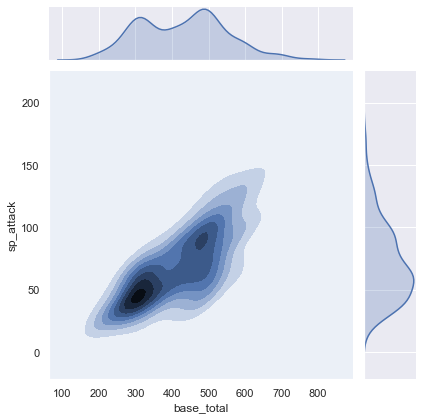

In [39]:
sns.jointplot(data=clean_df2, x='base_total', y='sp_attack', kind='kde')

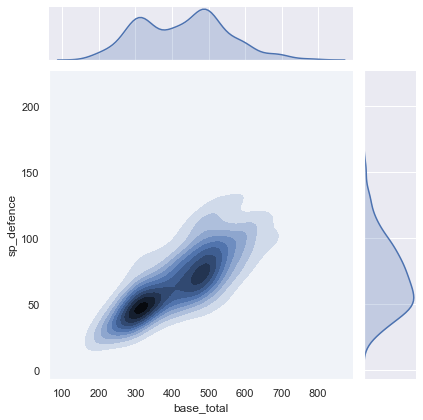

In [40]:
sns.jointplot(data=clean_df2, x='base_total', y='sp_defence', kind='kde')

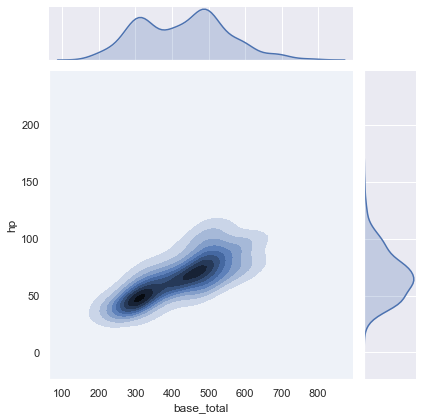

In [41]:
sns.jointplot(data=clean_df2, x='base_total', y='hp', kind='kde')

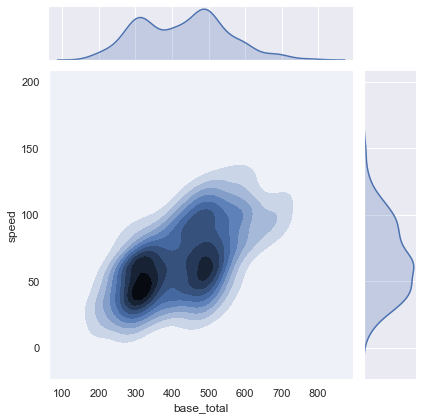

In [42]:
sns.jointplot(data=clean_df2, x='base_total', y='speed', kind='kde')

# Q5 Do speed and sp_attack correlate with each other?
--------------------------
Both speed and sp_attack show a slight 'bump' in their distribution and might be responsible for the two groups seen in the distribution of base_total. Do these two metrics correlate?

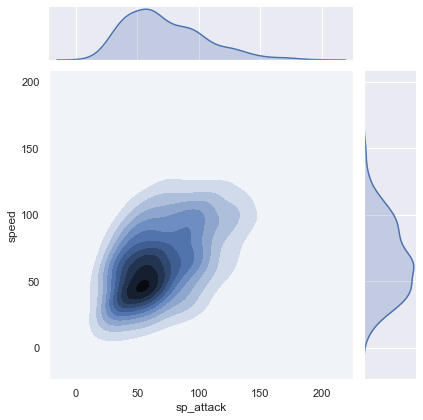

In [44]:
sns.jointplot(data=clean_df2, x='sp_attack', y='speed', kind='kde')

# Q6 What is the relation of the metrics that combine into the base_total metric?
--------------------------
It seems like they do correlate with each other, though no clear devision of the data into two groups appear. Maybe the two groups seen in base_total are caused by a combination between the metrics defence, sp_defence, attack, sp_attack, speed and hp. How do these 6 metrics relate to each other and how do they add up to the two 'high' and 'low' groups seen for the base_total metric?

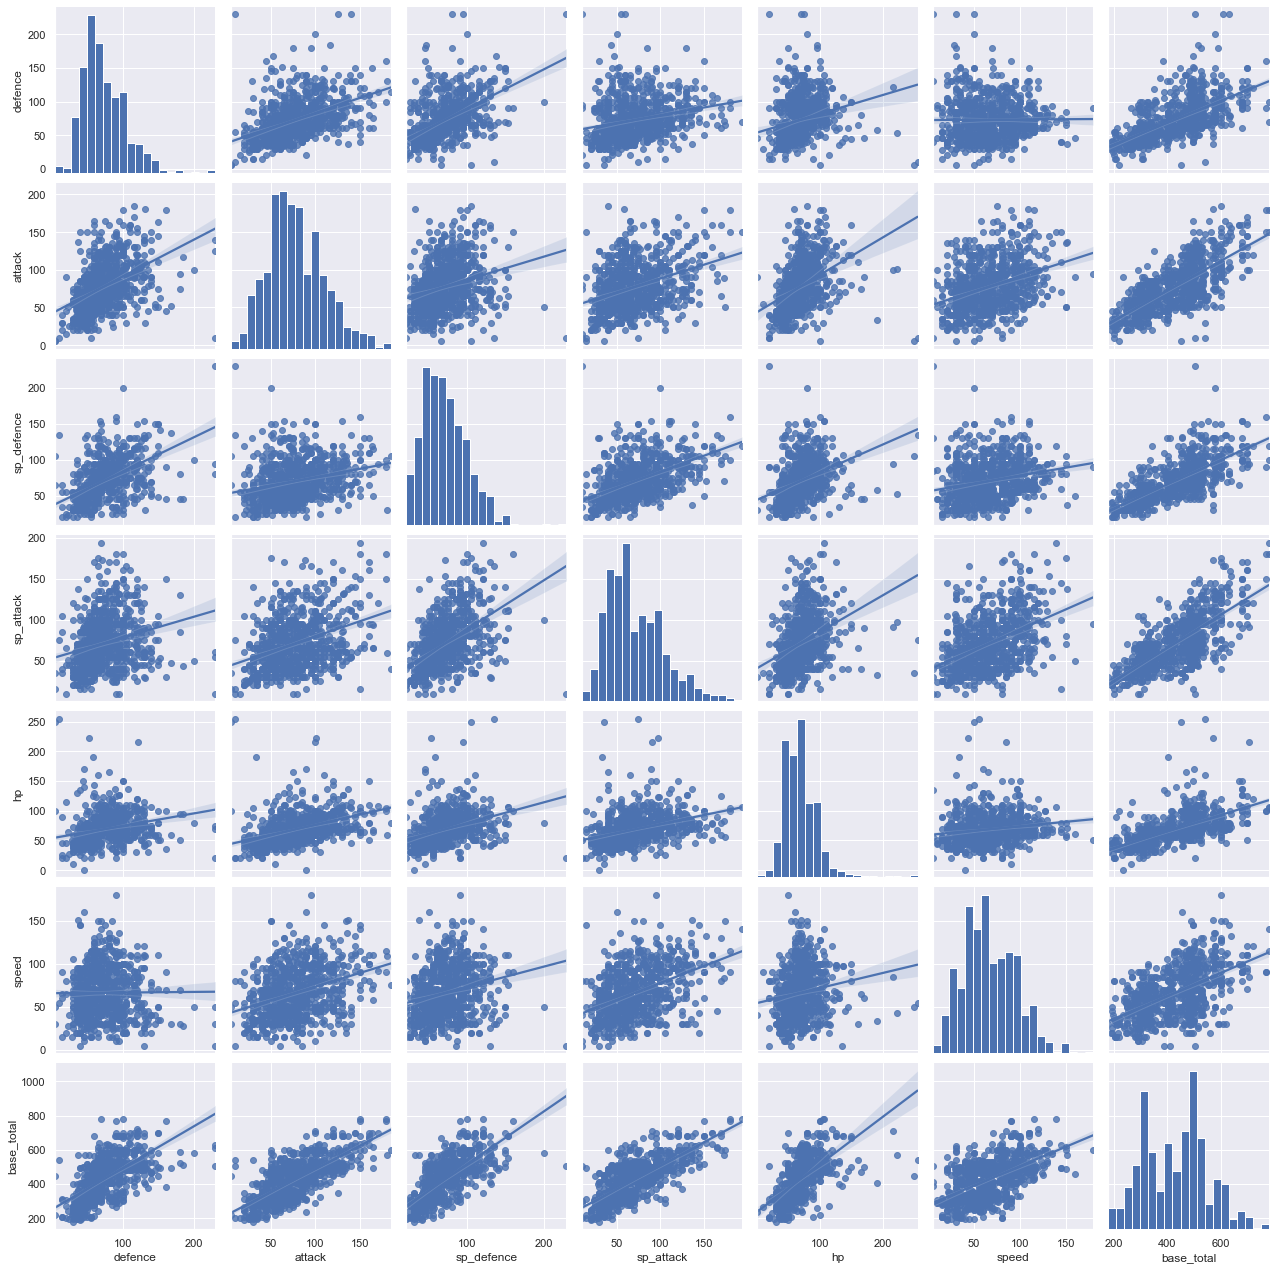

In [47]:
sns.set_style('darkgrid')
sns.pairplot(sns_df[['defence', 'attack', 'sp_defence', 'sp_attack', 'hp', 'speed', 'base_total']], 
             kind='reg', 
             diag_kws = {'bins':20})

Double peaks in distribution are seen for attack, sp_attack and speed, but how are they related? Are certain attribute distributions more common in the one groep vs. the other?

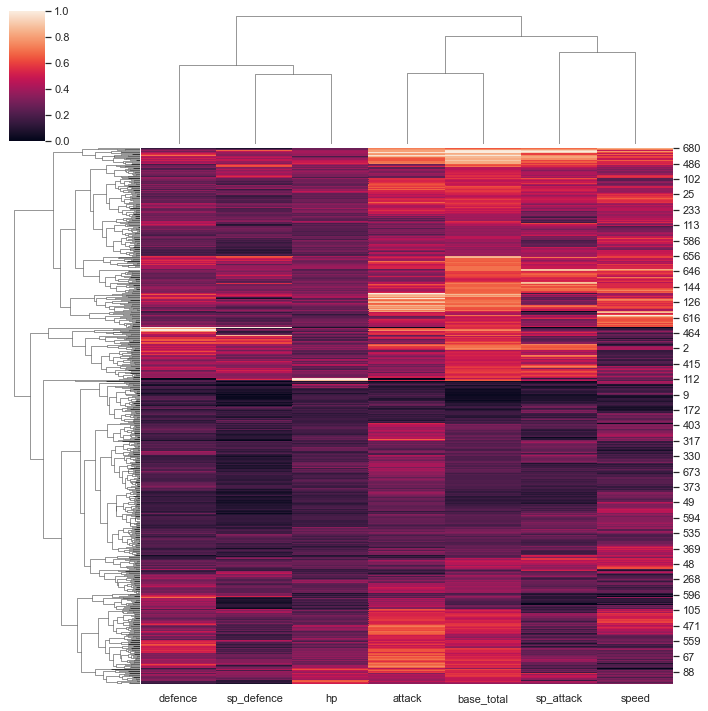

In [87]:
sns.clustermap(sns_df[['defence', 'attack', 'sp_defence', 'sp_attack', 'hp', 'speed', 'base_total']], 
              standard_scale=1, method='complete')

clustering shows that base_total is primarily influenced by high scores for the metrics attack, sp_attack, en speed. Pokemon cluster into two main groups with generally low or high values across metrics. These then show 6 general clusters with specific combinations of metric values:
- Cluster 1: high on all metrics (legendaries?)
- Cluster 2: high on attack, sp_attack and speed, slightly lower on defence, sp_defence and hp
- Cluster 3: high on defence, sp_defence, attack and sp_attack, low on hp and speed
- Cluster 4: pokemon with exceptionally high hp
- Cluster 5: low on all, except 1 metric
- Cluster 6: predominantly high on attack, low on sp_defence and sp_attack

# Q6 Does base_total also relate to weight or height?
--------------------------


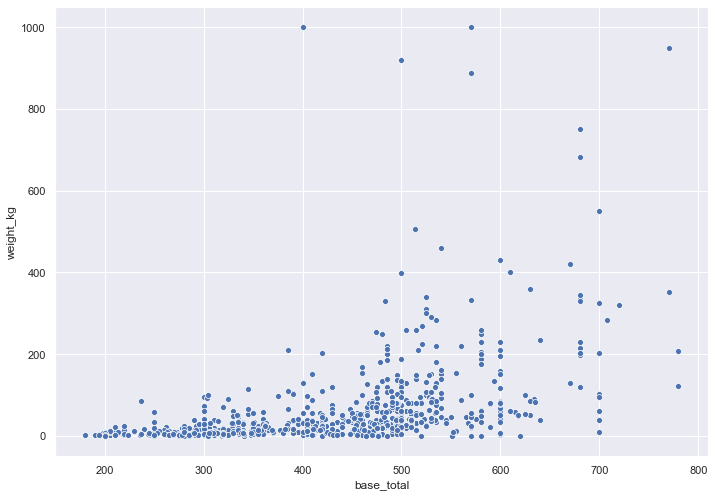

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=sns_df, x='base_total', y='weight_kg')

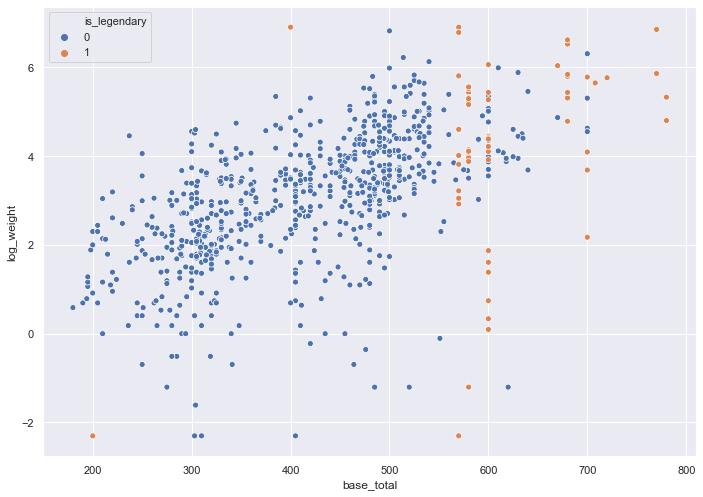

In [109]:
#Calculate log weigth
def norm_weight(dataf):
    return (dataf
            .assign(log_weight=dataf['weight_kg'].apply(np.log))
           )

sns_df = (sns_df
          .pipe(norm_weight)
         )

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(data=sns_df, x='base_total', y='log_weight', hue='is_legendary')

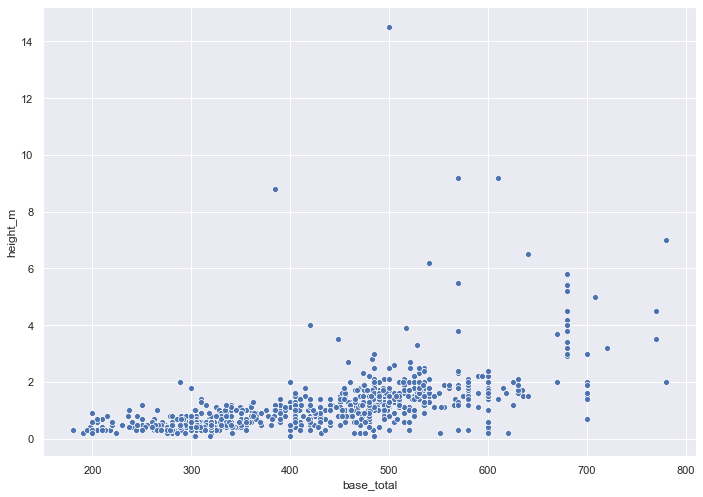

In [108]:
sns.scatterplot(data=sns_df, x='base_total', y='height_m')

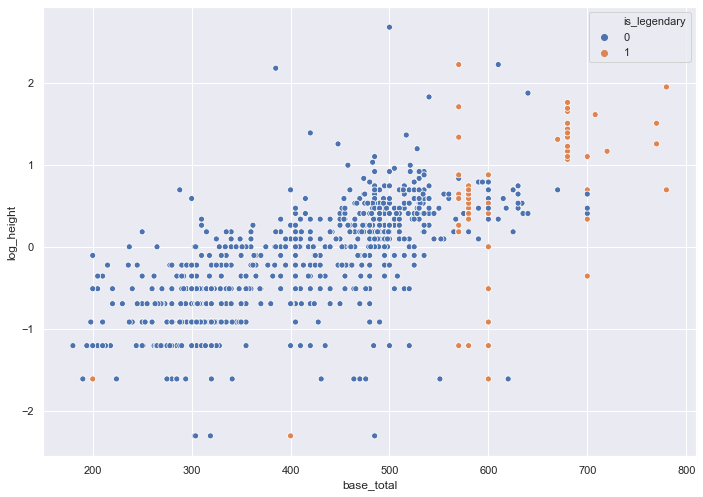

In [106]:
#Calculate log weigth
def norm_height(dataf):
    return (dataf
            .assign(log_height=dataf['height_m'].apply(np.log))
           )

sns_df = (sns_df
          .pipe(norm_height)
         )


sns.scatterplot(data=sns_df, x='base_total', y='log_height', hue='is_legendary')

Both weight and height correlate with base_total, which implies that weight and height influences speed, attack and defence power. Is this true?

In [110]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'log Weight')

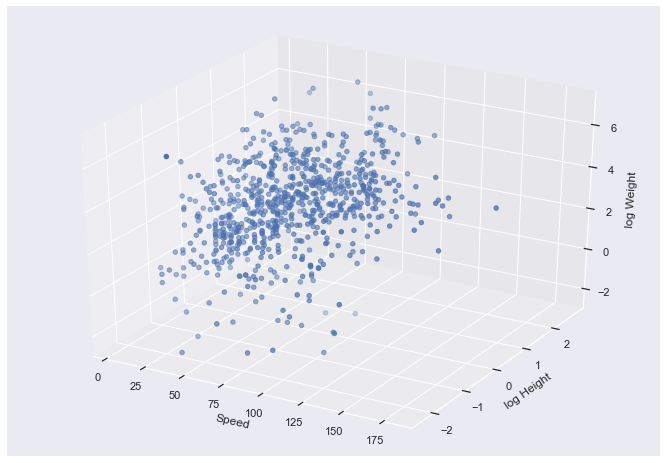

In [148]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sns_df['speed'], sns_df['log_height'], sns_df['log_weight'])


ax.set_xlabel('Speed')
ax.set_ylabel('log Height')
ax.set_zlabel('log Weight')


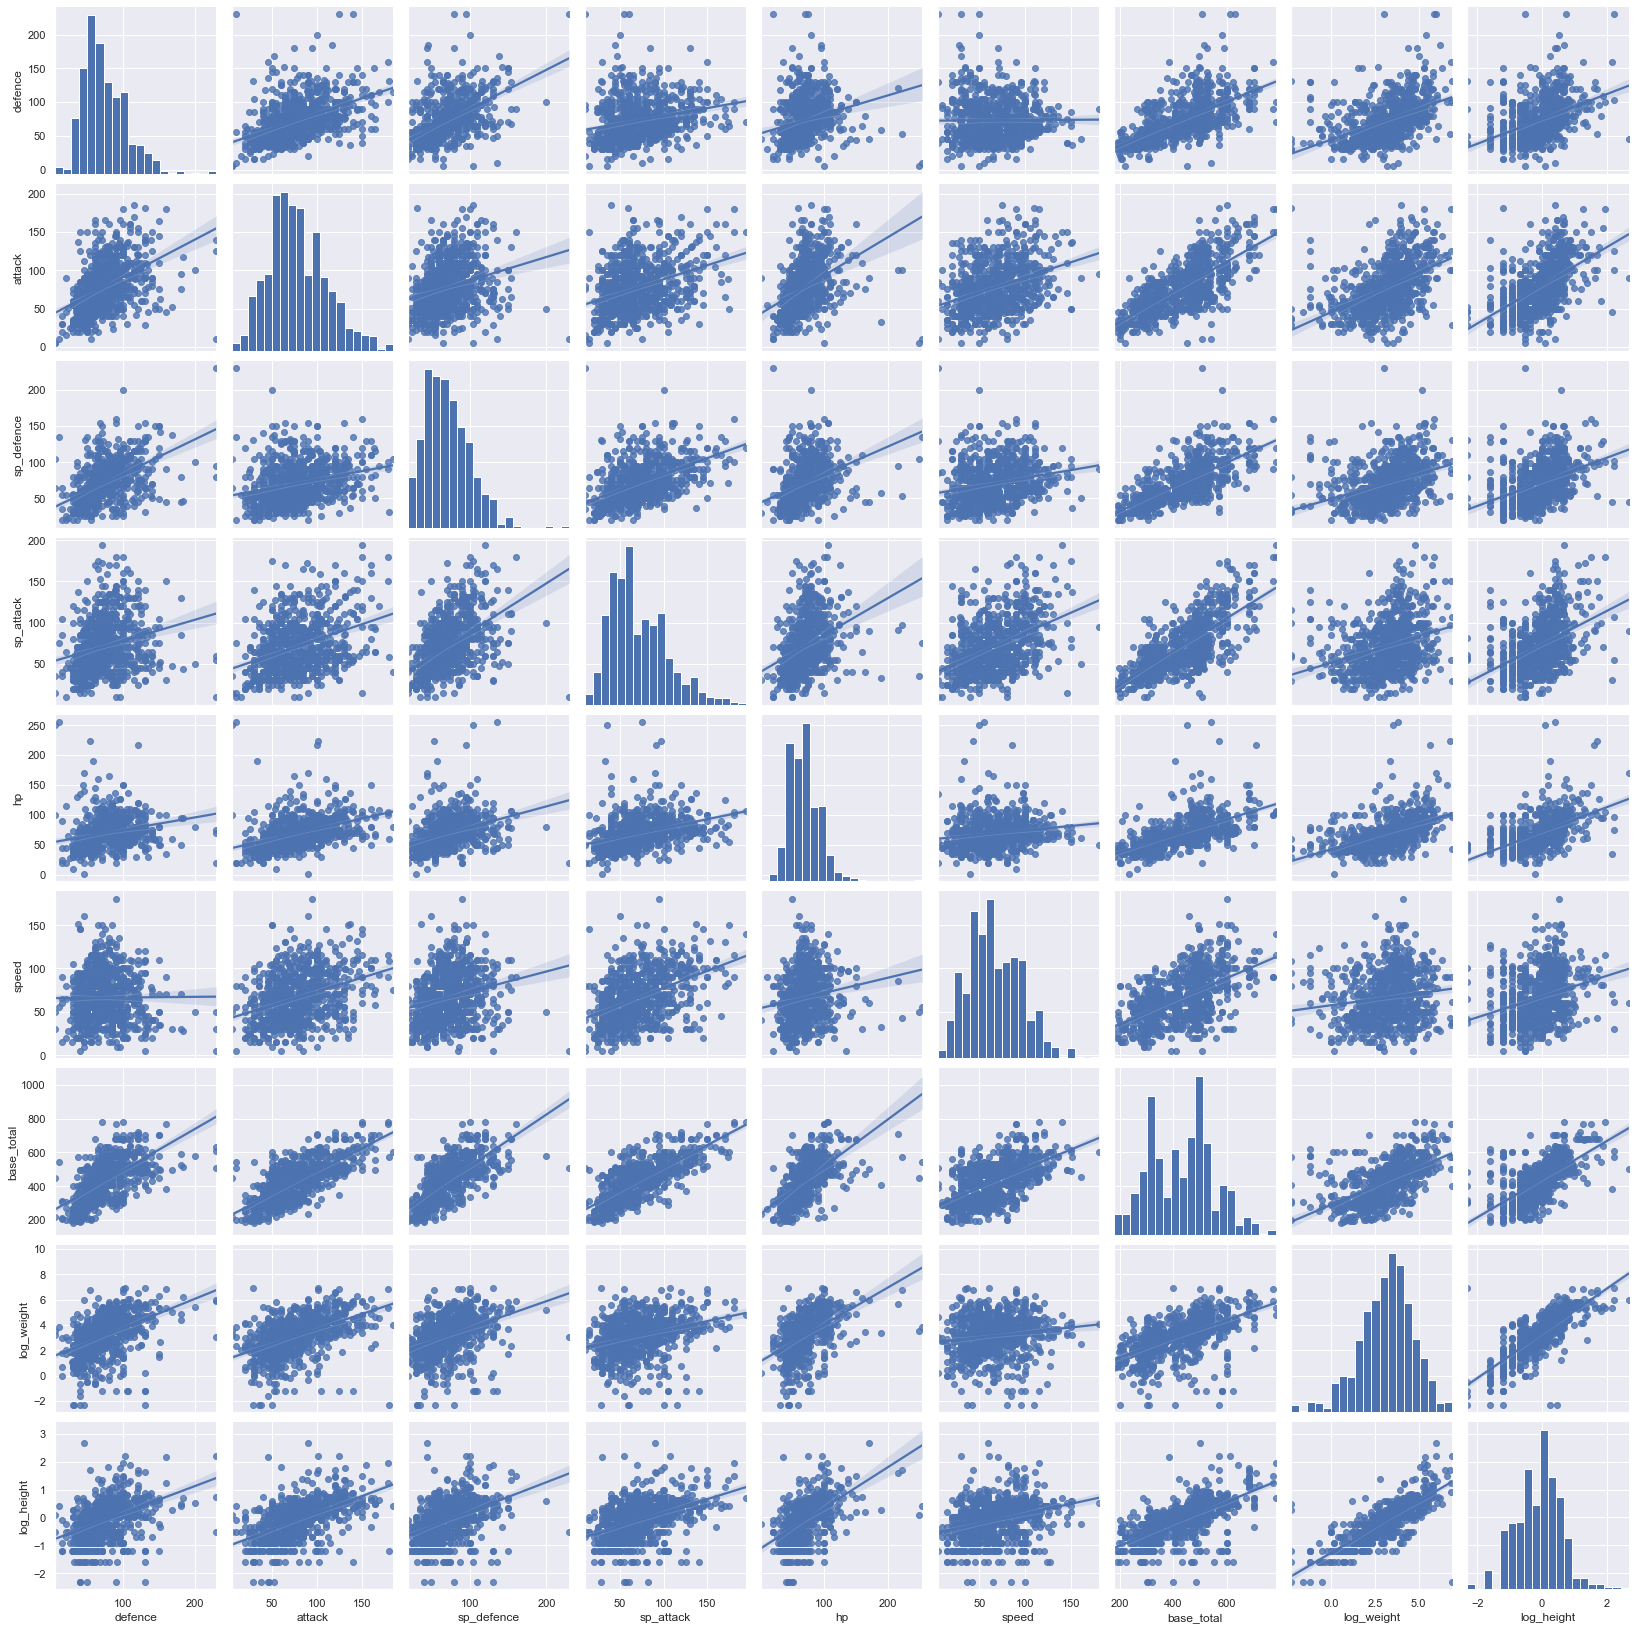

In [137]:
sns.pairplot(sns_df[['defence', 'attack', 'sp_defence', 'sp_attack', 'hp', 'speed', 'base_total', 'log_weight', 'log_height']], 
             kind='reg', 
             diag_kws = {'bins':20})

Both weight and height don't seem directly related to speed. A relationship can be seen for both height and weight with attack and defence metrics.

Text(0.5, 0, 'log Weight')

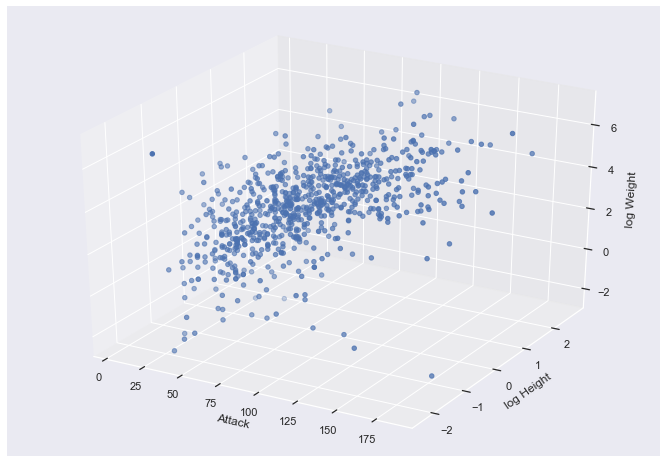

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sns_df['attack'], sns_df['log_height'], sns_df['log_weight'])


ax.set_xlabel('Attack')
ax.set_ylabel('log Height')
ax.set_zlabel('log Weight')

Text(0.5, 0, 'log Weight')

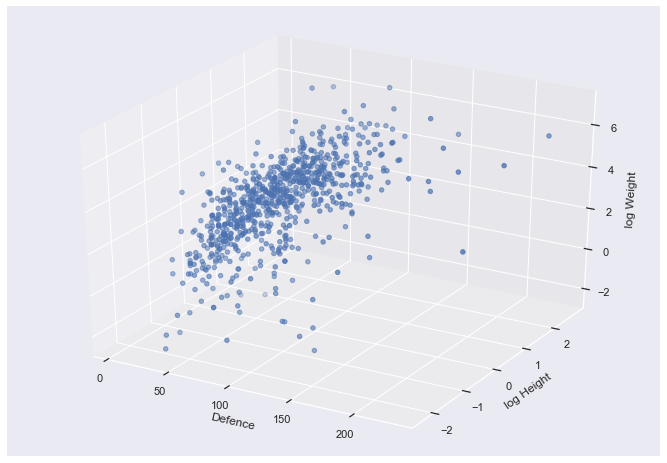

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sns_df['defence'], sns_df['log_height'], sns_df['log_weight'])


ax.set_xlabel('Defence')
ax.set_ylabel('log Height')
ax.set_zlabel('log Weight')

Both height and weight seem to have a positive correlation with Defence and Attack.

-----------------------------------

# Opdracht 2. 
-----------------------------------------------